<a href="https://colab.research.google.com/github/AnilMeena1512/AnilMeena1512/blob/master/Copy_of_MLCE__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)

%matplotlib inline

In [ ]:
scaler = MinMaxScaler((0,1),)

data = pd.read_csv('/content/All_Himalayan_data.csv')
cols=[]
for i in data:
    if '__' not in i :
        cols.append(i)
temp_df=pd.DataFrame(columns=cols)
for i in data:
    if '__' not in i :
        temp_df[i]=(data[i]).ravel()
temp_df.head()

,Unnamed: 0,Eq_ID,Magnitude,Rhypo,depth,pga_H,pga_V,pgd_H,pgd_V,pgv_H,pgv_V,site_condn_S
0,0,3,5.8,157.790085,33.0,0.022723,0.009569,1.748560,0.692361,1.857321,1.134184,0
1,1,3,5.8,180.891876,33.0,0.026120,0.013582,0.647979,0.431335,1.484418,0.711625,1
2,2,3,5.8,202.580685,33.0,0.015587,0.010135,0.643954,0.384226,0.864400,0.741174,0
3,3,3,5.8,82.669987,33.0,0.030750,0.009921,0.522978,0.741597,1.636860,0.870933,0
4,4,3,5.8,166.393882,33.0,0.038451,0.019911,1.286711,0.927593,2.979637,1.371383,1


In [ ]:
X = temp_df[["Magnitude","depth","Rhypo","site_condn_S"]].to_numpy() # 4 Input parameters
Y = temp_df[["pga_H","pga_V","pgd_H","pgd_V","pgv_H","pgv_V"]].to_numpy() # 6 Output parameters

shape_X = X.shape
shape_Y = Y.shape
m = X.shape[0]
p = X.shape[1]

print ('\nWe have m = %d training examples!' % (m))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

    
print("train_x's shape = ",X_train.shape)
print("train_y's shape ",Y_train.shape)

print("test_x's shape = ",X_test.shape)
print("test_y's shape = ",Y_test.shape)


We have m = 524 training examples!
train_x's shape =  (445, 4)
train_y's shape  (445, 6)
test_x's shape =  (79, 4)
test_y's shape =  (79, 6)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 102       
Total params: 790
Trainable params: 790
Non-trainable params: 0
_________________________________________________________________


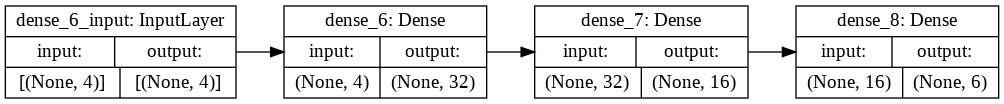

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# fit model
model.fit(x = X_train, y = Y_train, batch_size = 10, epochs=550,validation_split = 0.15, verbose = 2)

Epoch 1/550
38/38 - 1s - loss: 19.4003 - val_loss: 7.7278
Epoch 2/550
38/38 - 0s - loss: 19.1956 - val_loss: 7.4935
Epoch 3/550
38/38 - 0s - loss: 18.9249 - val_loss: 7.2853
Epoch 4/550
38/38 - 0s - loss: 18.7289 - val_loss: 7.0985
Epoch 5/550
38/38 - 0s - loss: 18.5139 - val_loss: 6.9786
Epoch 6/550
38/38 - 0s - loss: 18.3472 - val_loss: 6.8525
Epoch 7/550
38/38 - 0s - loss: 18.1812 - val_loss: 6.7428
Epoch 8/550
38/38 - 0s - loss: 18.0226 - val_loss: 6.6145
Epoch 9/550
38/38 - 0s - loss: 17.8691 - val_loss: 6.4957
Epoch 10/550
38/38 - 0s - loss: 17.7101 - val_loss: 6.3582
Epoch 11/550
38/38 - 0s - loss: 17.5488 - val_loss: 6.2348
Epoch 12/550
38/38 - 0s - loss: 17.3924 - val_loss: 6.1353
Epoch 13/550
38/38 - 0s - loss: 17.3483 - val_loss: 6.0172
Epoch 14/550
38/38 - 0s - loss: 17.1013 - val_loss: 5.9248
Epoch 15/550
38/38 - 0s - loss: 16.9745 - val_loss: 5.8189
Epoch 16/550
38/38 - 0s - loss: 16.8217 - val_loss: 5.7047
Epoch 17/550
38/38 - 0s - loss: 16.7023 - val_loss: 5.6138
Epoch 

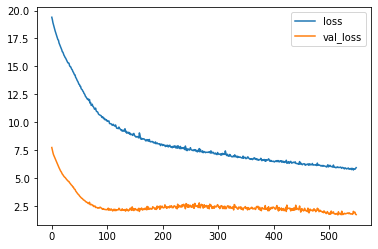

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
y_predict = model.predict(X_test)
ypdf = pd.DataFrame(y_predict)
ytdf = pd.DataFrame(Y_test)

In [ ]:
model.evaluate(x=X_test, y=Y_test)

3/3 [==============================] - 0s 4ms/step - loss: 12.0787


12.078662872314453

In [ ]:
#R2 score 
def coeff_determination(y_true, y_pred):
    SS_res =  np.sum(np.square( y_true-y_pred )) 
    SS_tot = np.sum(np.square( y_true - np.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot) )

for i in range(6):
  print(coeff_determination(ytdf[i], ypdf[i]))

0.5253964687594096
0.7118937058950927
0.8528479707316333
0.611447557222145
0.8705198221249881
0.8239979352685849


In [ ]:
# gg

In [ ]:
# hidden_layers = tf.keras.backend.function(
# [model.layers[0].input],  # we will feed the function with the input of the first layer  
# [model.layers[0].output,] # we want to get the output of the first layer
# )
# print(hidden_layers)

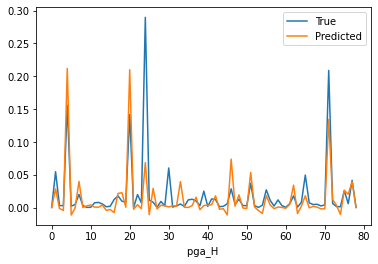

In [ ]:
plt.plot(Y_test[:,0], label='True')
plt.plot(y_predict[:,0], label='Predicted')
plt.xlabel('pga_H ')
plt.legend()

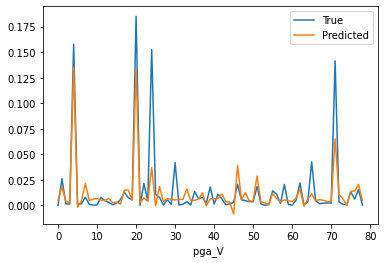

In [ ]:
plt.plot(Y_test[:,1], label='True')
plt.plot(y_predict[:,1], label='Predicted')
plt.xlabel('pga_V ')
plt.legend()

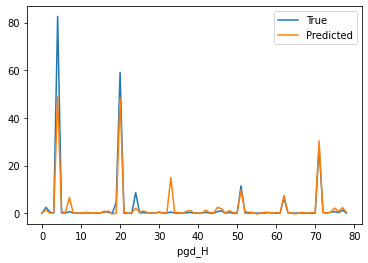

In [ ]:
plt.plot(Y_test[:,2], label='True')
plt.plot(y_predict[:,2], label='Predicted')
plt.xlabel('pgd_H ')
plt.legend()

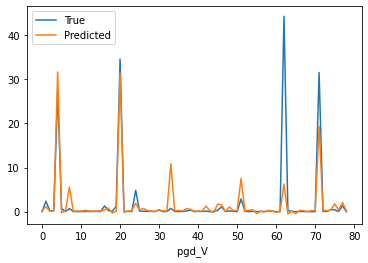

In [ ]:
plt.plot(Y_test[:,3], label='True')
plt.plot(y_predict[:,3], label='Predicted')
plt.xlabel('pgd_V ')
plt.legend()

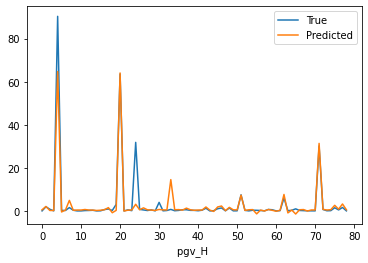

In [ ]:
plt.plot(Y_test[:,4], label='True')
plt.plot(y_predict[:,4], label='Predicted')
plt.xlabel('pgv_H ')
plt.legend()

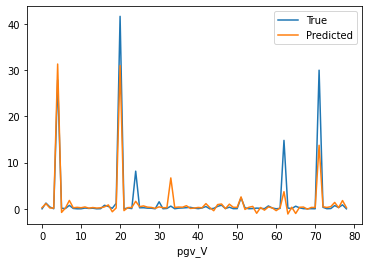

In [ ]:
plt.plot(Y_test[:,5], label='True')
plt.plot(y_predict[:,5], label='Predicted')
plt.xlabel('pgv_V ')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
for i in range(6):
  print(mean_squared_error(ytdf[i], ypdf[i], squared=False))

0.031103980003412933
0.018611378441384357
4.483795835310313
4.765598647499667
4.685487564922325
2.775158925627101
